# Computational Social Science Project #3 

**Enter your Name:**Nereida Heller

*Semester:* Fall 2024

Nb: I poked around the Chicago open data portal looking for this dataset in hopes of finding a data dictionary, to no avail. It'd be really great to have one! I have so little sense of what some of these variable names mean and I'm not used to operating without better understanding of what the variables show, how the data was collected. In particular, feature selection seems nearly impossible without better understanding of what the data actually mean. In real ML world, they think about that stuff, right? We're just eschewing it in class bc the we're worried about learning the methods and not the substance of the policy recs?

## 1. Introduction

### Load data 

Binarize y or not? 
DO we eventually combine 11-13 with 14?

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

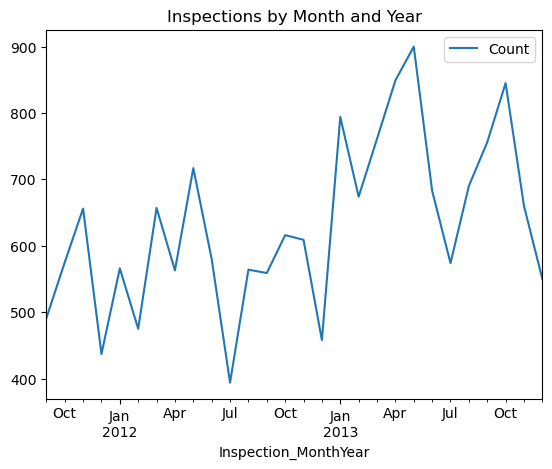

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year"); 

Let's visualize what the distribution of results looks like.

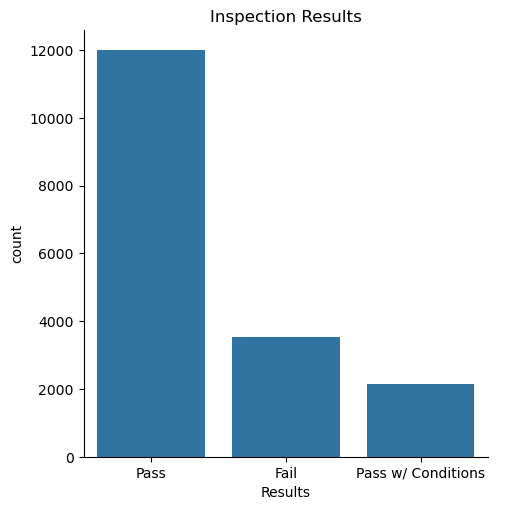

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

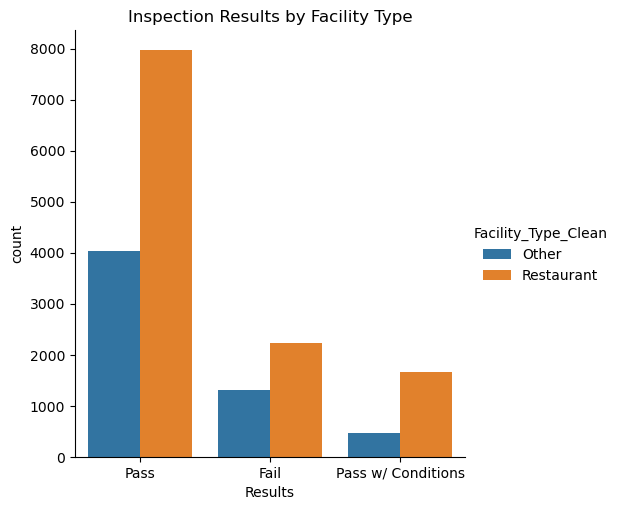

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']
# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


In [13]:
#X.to_csv("X.csv", index=False)

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

This is a large dataset, with over 15,000 rows and about 40 features. 

I’m thinking of running the following models: 
1. Logistic Regression. Picking this because I’m most familiar with it. I don’t know if the underlying distribution of the result variable is linear, but I figure I might as well see how the logistic regression fits. If I remember correctly, logistic regression is well-suited to binary outcomes, as well. 

2. Random Forests. These models build multiple decision trees, each trained on a randomly sampled subset of the data and I think also a subset of features? The model predicts the outcome averaged across trees to reduce overfitting. There are a lot of features and a lot of observations, so I’m thinking RF will do well with this complex set. RF also has built-in penalties for overfitting which is going to be a problem with all of these features

3. 
XGBoost: Gradient Boosting builds decision trees one at a time, with each new tree focused on correcting the mistakes made by the previous ones. The model continues adding trees until it can’t improve significantly. XGBoost is a faster version of this approach. As the model focuses on cases that other trees have misclassified it improves. This results in high accuracy. I’m thinking of using this for the same reasons as RF: complexity and overfitting penalties.

In [14]:
# Partitioning data, skipping validate bc of 2014 data availability
#-----------

# import library
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

# I'm going to use the standard ratios we were taught in class. 
# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 
                                                    y,                 
                                                    train_size=.8,     
                                                    test_size=.2) 



### Model 1: OLS

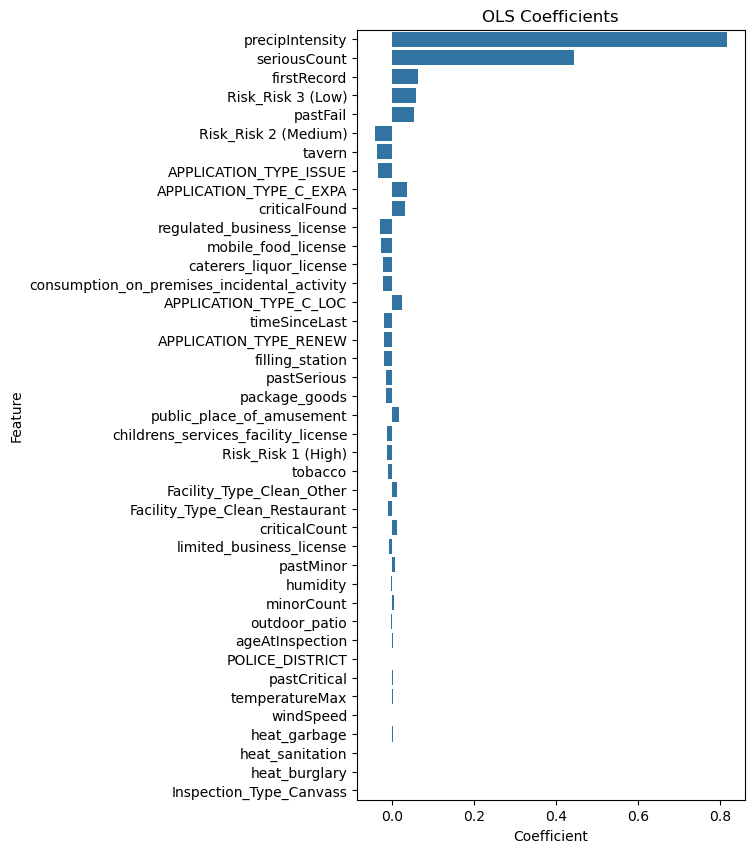

,Feature,Coefficient
23,precipIntensity,8.172773e-01
1,seriousCount,4.436942e-01
8,firstRecord,6.218772e-02
33,Risk_Risk 3 (Low),5.662210e-02
3,pastFail,5.195926e-02
32,Risk_Risk 2 (Medium),-4.358272e-02
18,tavern,-3.864018e-02
39,APPLICATION_TYPE_ISSUE,-3.584654e-02
37,APPLICATION_TYPE_C_EXPA,3.436870e-02
30,criticalFound,3.153449e-02


In [15]:
# create a model -- not tuning yet
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# taking a look
# dataframe
lin_reg_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_model.coef_.flatten()
})

#plot
#lin_reg_data = lin_reg_data.sort_values(by='Coefficient', ascending=False)
lin_reg_data = lin_reg_data.reindex(lin_reg_data['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(5, 10))

lin_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data)                         

lin_reg_plot.set_title("OLS Coefficients") 
#plt.xlim(-.006,.01)
plt.show() 
#coefficients
lin_reg_data

#### Tuning OLS

In [16]:
# GridSearchCV
#Hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}          

# grid search
lin_grid_reg = GridSearchCV(estimator  = lin_reg,      
                            param_grid = param_grid,   
                            cv=3)                      

# fit the tuning
lin_grid_reg.fit(X_train, y_train)

# selection
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_test)   

# Root mean squared error
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

# printing
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"])) #didn't want to run this one
print('Validation R^2:', lin_grid_reg.score(X_test, y_test))
print('Validation RMSE', rmse(best_lin_pred, y_test))

{'fit_intercept': True}
Best CV R^2: 0.5918248206291414
Validation R^2: 0.5866479170887229
Validation RMSE 0.25817191353142027


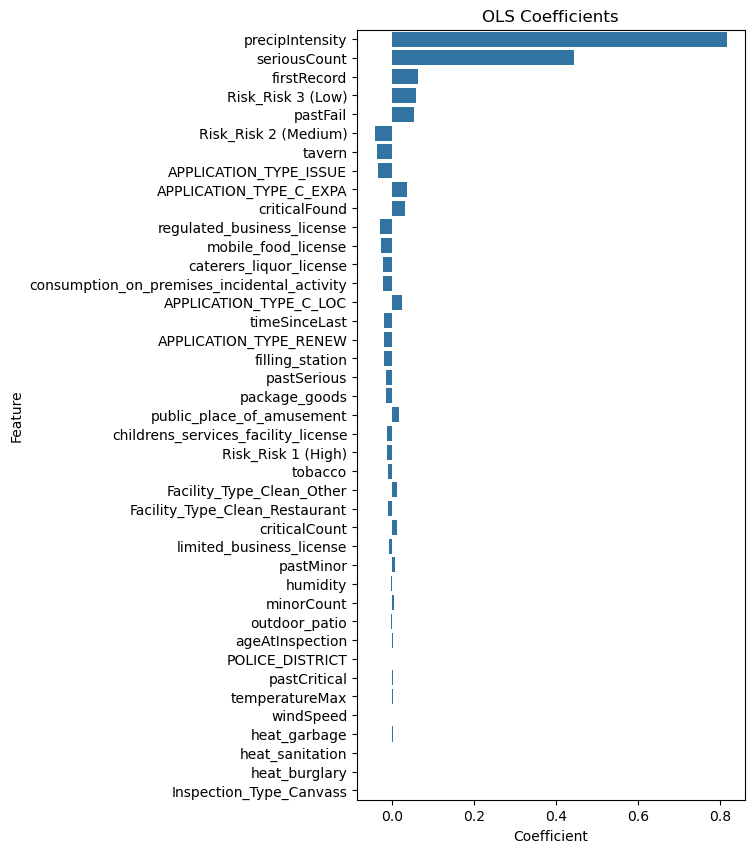

,Feature,Coefficient
23,precipIntensity,8.172773e-01
1,seriousCount,4.436942e-01
8,firstRecord,6.218772e-02
33,Risk_Risk 3 (Low),5.662210e-02
3,pastFail,5.195926e-02
32,Risk_Risk 2 (Medium),-4.358272e-02
18,tavern,-3.864018e-02
39,APPLICATION_TYPE_ISSUE,-3.584654e-02
37,APPLICATION_TYPE_C_EXPA,3.436870e-02
30,criticalFound,3.153449e-02


In [17]:
# running again incorporating tuning advice.
lin_reg = LinearRegression(fit_intercept = True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# taking a look
# dataframe
lin_reg_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_model.coef_.flatten()
})

#plot
#lin_reg_data = lin_reg_data.sort_values(by='Coefficient', ascending=False)
lin_reg_data = lin_reg_data.reindex(lin_reg_data['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(5, 10))

lin_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data)                         

lin_reg_plot.set_title("OLS Coefficients") 
#plt.xlim(-.006,.01)
plt.show() 
#coefficients
lin_reg_data

###  Model 2: Random Forest

In [18]:
y.shape

(15311, 1)

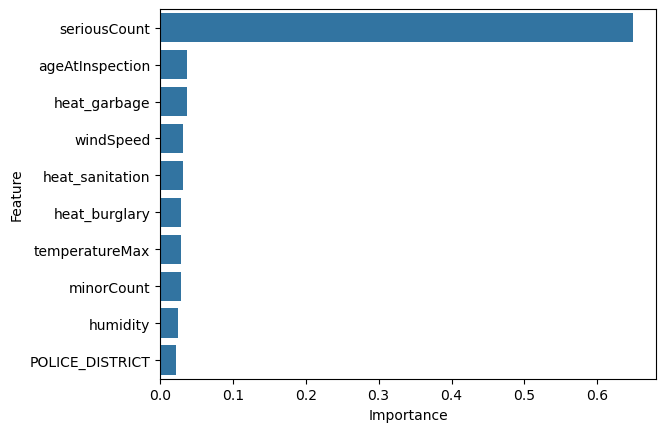

In [19]:
# initialize a random forest classifier. using parameters from class as a starting point.
rf_classifier = RandomForestClassifier(
                       n_estimators=100,              # specify the number of trees (100 is default, a good starting point)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go (NH: none: can go as long as needs to)
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping -- how soon are you going to stop?
                       random_state = 10)             # random seed

# specify cross-validation
# NH: trained model to give output of scores
scores = cross_val_score(rf_classifier, 
                         X_train, 
                         y_train.ravel(), # Seems like .ravel this is necessary given the shape of our data
                         cv=5)

# calculate the average score across models
# NH: goal is to increase this accuracy score
scores.mean()

# fit the random forest on data to get feature importance
# NH: now fitting on X to make prediction -- separate thing. the above only works in cross val score function
rf_classifier.fit(X_train, y_train.ravel())

# import library
import seaborn as sns

# create feature importance dataframe NH: this is not to coming  score above
feat_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()



#### Tuning RF

In [ ]:
# Define the hyperparameter grid (essentially just putting in all of the ones from the example in class. 
# not sure if this is best practice. this code took a good 20 minutes to run)
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees (exploring different values)
    'criterion': ['gini', 'entropy'],      # Split criterion: Gini impurity or Entropy
    'max_depth': [None, 10, 20, 30],        # Maximum depth of trees (None means no limit)
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'max_leaf_nodes': [None, 10, 20],      # Maximum number of leaf nodes
    'min_impurity_decrease': [1e-07, 1e-05, 1e-03], # Threshold for early stopping
    'bootstrap': [True, False]             # Use bootstrap sampling or not
}
# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)  # Use all available cores for parallel computation

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test data
test_score = grid_search.score(X_test, y_test)
print("Test set score with best parameters:", test_score)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


### Model 3: XGBoost

In [ ]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score), # Measures the proportion of correct predictions out of the total number of predictions.
          'recall': make_scorer(recall_score), # false negatives
          'precision': make_scorer(precision_score),  # how often is model correct when it's predicting target class
          'f1': make_scorer(f1_score) # average between recall and precision
          }


# perform cross-validation with 5-fold and return the trained estimators. unlike cross_val_score, gives recall, precision, and f1 in addition to accuracy
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

# final fit
xgb_classifier.fit(X, y.ravel())



### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

How well did your model do? 

Report accuracy, recall, precision, F1 score. 

Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why

Accuracy measures the proportion of correct predictions (true positives + true negatives) among all predictions. Might not be great for this data since it's highly imbalanced.

Precision measures how many positive predictions are actually correct (focuses on the correctness of positive predictions).

Recall, or sensitivity, measures how many actual positives are correctly predicted (focuses on finding all true positives). Going to be important here bc we're don't want to poison people by accident.

The F1 Score is a harmonic mean of precision and recall, providing a balanced metric when you seek a trade-off.?

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [ ]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------


In [ ]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------


In [ ]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------


In [ ]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [ ]:
# data processing
# -----------

# process features
X_test2014 = chicago_inspections_2014[...]

# process target 
y_test2014 = chicago_inspections_2014[...]


In [ ]:
# predict and compare 
# -----------


In [ ]:
# evaluate
# -----------


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Accuracy alone can be a misleading measure of a model’s effectiveness in social science/policy spaces. For instance, if the data has class imbalance, the model could have very high accuracy scores simply by predicting the majority class but still be a poor model in that it would fail to identify the minority class, where the actual policy intervention is often needed. In class we’ve talked about metrics like precision, recall, and AUC-ROC to solve for this. Precision and recall are also ways of measuring false positives and negatives, which are always going to be a problem when using these methods in the world of human interaction and behavior. By taking precision and recall into account, we can balance the false positive and negative rates in our understanding of the model. We’ve also talked a fair bit about fairness and equity in these models. I don’t think we’ve landed on a particular/preferred way to measure fairness but it’s going to be something we have to think about when using these models, and accuracy just won’t capture it.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

A few things occur: (1) retest your model; (2) figure out some way to either prevent or detect manipulation of this type; (3) randomly audit in addition to targetted auditing.

For (1), you'd essentially have to regularly audit and test the models to ensure they are still effective in identifying indicators of concern, even if establishments have started altering their behavior. Honeslty this seems like best practice to me anyway. Everything I've read about algorithmic policy decisions makes me think that continuous updating and feedback and adjustment is crucial. 

For (2), you might want to apply some non-mathematical measures, letting audittees know that you're looking for manipulated inputs and what the consequences of that might be. You could publicly share what your expectations for global input distribution are and investigate folks that fall outside of that (totally possible that that could happen for innocent reasons, but you'd want to look into how and why that's happening). 

(3) works as a kind of combination of (1) and (2) -- it would inform your model and also foster a sense that auditing can happen to anyone at any time. 